# Introduction

In [4]:
import pandas as pd

# this is pandas, it is what we use to load dataframes!

In [5]:
import matplotlib.pyplot as plt

# This uploads my data 

In [6]:
table = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\Book(Sheet1).csv")

# Introduce the data: 

urban_area: multiple regions in the United States

Population_group: the amount of people in those urban areas 

1982-2020: the years and how much fuel was wasted that year

Short_term_percentage (2015 to 2020): The percentage change in wasted fuel

Short_term_rank (2015 to 2020): A ranking of urban areas based on their short-term percentage change

Long_term_percentage (1982 to 2020): The percentage changed over a much longer period

Long_term_rank (1982 to 2020): A ranking of urban areas based on their long-term change 


In [7]:
table.head()

,Urban_area,population_group,(R) 1982,(R) 1985,(R) 1990,(R) 1991,(R) 1992,(R) 1993,(R) 1994,(R) 1995,...,(R) 2015,(R) 2016,(R) 2017,2018,2019,2020,short_term_percentage,short_term_rank,long_term_percentage,long_term_rank
0,"Akron, OH",Medium,0.9,1.4,3.0,3.4,4.2,4.8,5.1,5.3,...,6.5,6.6,6.6,6.7,6.7,4.7,-27.6,18.0,427.2,27.0
1,"Albany-Schenectady, NY",Medium,0.6,0.8,1.4,1.5,1.6,1.6,1.8,1.9,...,5.2,5.3,5.3,5.8,6.2,4.2,-19.7,7.0,623.4,14.0
2,"Albuquerque, NM",Medium,2.0,2.3,3.4,3.7,4.0,4.5,4.9,5.5,...,9.0,9.2,9.1,8.9,9.1,4.3,-52.7,77.0,118.1,86.0
3,"Allentown-Bethlehem, PA-NJ",Medium,1.2,1.4,2.1,2.3,2.6,3.0,3.5,4.0,...,5.7,5.7,5.8,6.1,5.7,2.9,-49.1,63.0,141.5,79.0
4,"Anchorage, AK",Small,0.4,0.5,0.9,1.0,1.1,1.2,1.3,1.4,...,2.7,2.7,2.9,2.8,2.7,1.2,-56.4,86.0,219.9,59.0


# This is the categorizes in my dataset

In [8]:
table.dtypes

Urban_area                object
population_group          object
(R) 1982                 float64
(R) 1985                 float64
(R) 1990                 float64
(R) 1991                 float64
(R) 1992                 float64
(R) 1993                 float64
(R) 1994                 float64
(R) 1995                 float64
(R) 1996                 float64
(R) 1997                 float64
(R) 1998                 float64
(R) 1999                 float64
(R) 2000                 float64
(R) 2001                 float64
(R) 2002                 float64
(R) 2003                 float64
(R) 2004                 float64
(R) 2005                 float64
(R) 2006                 float64
(R) 2007                 float64
(R) 2008                 float64
(R) 2009                 float64
(R) 2010                 float64
(R) 2011                 float64
(R) 2012                 float64
(R) 2013                 float64
(R) 2014                 float64
(R) 2015                 float64
(R) 2016  

In [9]:
table.columns

Index(['Urban_area', 'population_group', '(R) 1982', '(R) 1985', '(R) 1990',
       '(R) 1991', '(R) 1992', '(R) 1993', '(R) 1994', '(R) 1995', '(R) 1996',
       '(R) 1997', '(R) 1998', '(R) 1999', '(R) 2000', '(R) 2001', '(R) 2002',
       '(R) 2003', '(R) 2004', '(R) 2005', '(R) 2006', '(R) 2007', '(R) 2008',
       '(R) 2009', '(R) 2010', '(R) 2011', '(R) 2012', '(R) 2013', '(R) 2014',
       '(R) 2015', '(R) 2016', '(R) 2017', '2018', '2019', '2020',
       'short_term_percentage', 'short_term_rank', 'long_term_percentage',
       'long_term_rank'],
      dtype='object')

In [10]:
table.shape

(108, 39)

# This describes my dataset

In [11]:
table.describe

<bound method NDFrame.describe of                         Urban_area population_group  (R) 1982  (R) 1985  \
0                        Akron, OH           Medium       0.9       1.4   
1           Albany-Schenectady, NY           Medium       0.6       0.8   
2                  Albuquerque, NM           Medium       2.0       2.3   
3       Allentown-Bethlehem, PA-NJ           Medium       1.2       1.4   
4                    Anchorage, AK            Small       0.4       0.5   
..                             ...              ...       ...       ...   
103  Very large urban area average       Very large      34.9      42.0   
104       Large urban area average            Large       3.3       4.6   
105      Medium urban area average           Medium       1.6       1.9   
106       Small urban area average            Small       0.4       0.5   
107                            NaN              NaN       NaN       NaN   

     (R) 1990  (R) 1991  (R) 1992  (R) 1993  (R) 1994  (R) 1995  

In [12]:
table['Urban_area']

0                          Akron, OH
1             Albany-Schenectady, NY
2                    Albuquerque, NM
3         Allentown-Bethlehem, PA-NJ
4                      Anchorage, AK
                   ...              
103    Very large urban area average
104         Large urban area average
105        Medium urban area average
106         Small urban area average
107                              NaN
Name: Urban_area, Length: 108, dtype: object

# Finally this is my visualization and I used a scattter graph to show the relation between the year 2020 and short term ranking 

The scatter chart below compares the short-term congestion ranking with the wasted fuel in 2020 across urban areas within the United States. Based on this chart the majority of urban areas wasted only a little of fuel, but some of the large metro areas wasted over 100 million gallons just in 2020.

<Axes: xlabel='short_term_rank', ylabel='2020'>

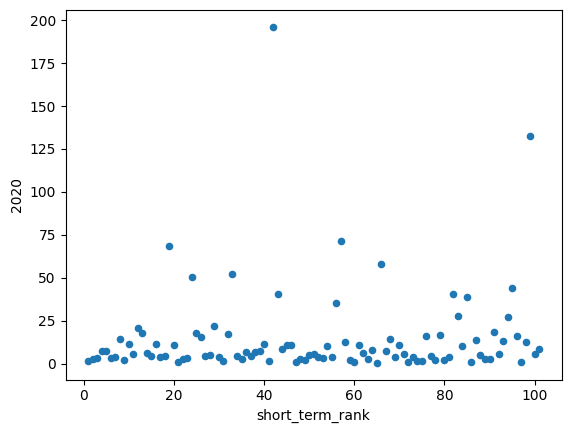

In [13]:
table.plot(x='short_term_rank', y='2020', kind='scatter')

<Axes: xlabel='short_term_rank'>

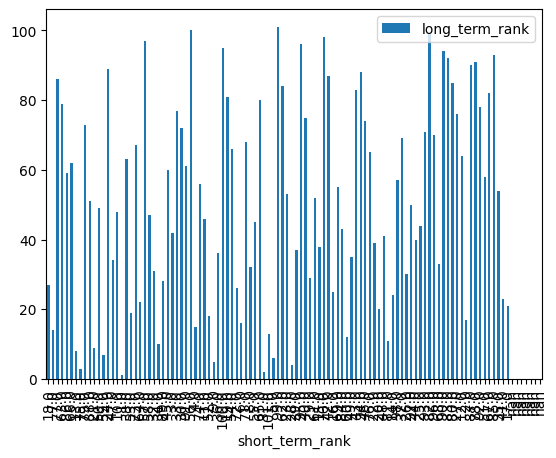

In [33]:
table.plot(x = 'short_term_rank', y = 'long_term_rank',kind = 'bar')
